In [ ]:
## Deep Learning Course (980)
## Assignment One 

__Assignment Goals__:
- Start with TensorFlow (version 1.0).
- Implement and apply a multi-layer feed-forward neural network classifier.
- Understand the differences and trade-offs between linear regression, logistic regression, and multi-layer feed-forward neural network.

In this assignment, you will be asked to install TensorFlow and Jupyter Notebook. In addition, you will design a Multilayer feed-forward neural network to classify a Toy Dataset (Figure 1).

__DataSet__: dataset has 100 instances and two features. 

1. Install TensorFlow (1.15.0) and Jupyter Notebook. (15 points)
Run the provided code [Linear Regression](#linear_regression). This code uses linear regression and threshold classifier to classify the TOY [DataSet](#TOY_DataSet). Analyze the classifier result. The implemented regression code has a problem compared to [the linear regression model](http://cs229.stanford.edu/notes/cs229-notes1.pdf). Correct the code and describe the effect on classification accuracy. What is the reason for the change in accuracy? (10 points)
2. Using code similar to what was provided for linear regression, implement logistic regression.How does the result change. 
Hint: What is the correct loss function for logistic regression compared to linear regression? (20 points)
3. Implement a multi-layer feed-forward neural net and try to reach 100 accuracy (You are not allowed to use Keras and tf.nn and tf.losses for this part). Comapre regression model's capacity whith the multi layer. (20 points)
4. Use tf.keras to implement the exact graph that you Implemented in the section 3. (25 points)

__Submission Notes__:

Please use Jupyter Notebook. The notebook should include the final code, results and your answers. You should submit your Notebook in .pdf and .ipynb format. (10 points)
 
You can use visualize() helper function to visualize the model's decision boundary.

__Instructions__:

The university policy on academic dishonesty and plagiarism (cheating) will be taken very seriously in this course. Everything submitted should be your own writing or coding. You must not let other students copy your work. Spelling and grammar count.

Your assignments will be marked based on correctness, originality (the implementations and ideas are from yourself), clarification and test performance.


In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline
#this line makes the notebook put the figures in-line rather than generate them in new windows

In [8]:

# helper function for geterating the data
def data_generator(N=100, D=2, K=2):
    # N number of points per class; D dimensionality; k number of classes
    np.random.seed(0)
    X = np.zeros((N * K, D))
    y = np.zeros((N * K), dtype='uint8')
    for j in range(K):
        ix = range(N * j, N * (j + 1))
        r = np.linspace(0.0, 1, N)  # radius
        t = np.linspace(j * 4, (j + 1) * 4, N) + np.random.randn(N) * 0.2  # theta
        X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
        y[ix] = j
    fig = plt.figure()
    plt.title('Figure 1: DataSet')
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)

    plt.xlim(X.min() - .5, X.max() + .5)
    plt.ylim(X.min() - .5, X.max() + .5)
    return X, y


# helper function for visualizing the boundaries
def visualize(sample, target, predict, se):
    """
    function for visualizing the classifier boundaries on the TOY dataset.

    @param sample: Training data features
    @param target: Target 
    @param predict: Model prediction
    @param se: The model's session
    """

    h = 0.02
    x_min, x_max = sample[:, 0].min() - 1, sample[:, 0].max() + 1
    y_min, y_max = sample[:, 1].min() - 1, sample[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = np.round(se.run(predict, {X: (np.c_[xx.ravel(), yy.ravel()])}))
    Z = Z.reshape(xx.shape)
    fig = plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(sample[:, 0], sample[:, 1], c=target, s=40, cmap=plt.cm.Spectral)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())


<a id='TOY_DataSet'></a>

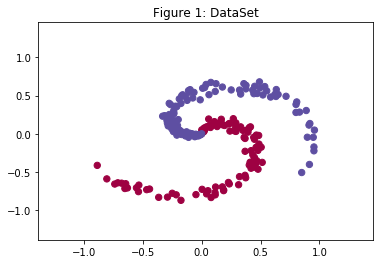

In [9]:
#  TOY DataSet
sample, target = data_generator()
# print(target.shape)

<a id='linear_regression'></a>

Epoch: 1 loss: 0.465 acc: 0.675
Epoch: 2 loss: 0.353 acc: 0.690
Epoch: 3 loss: 0.280 acc: 0.695
Epoch: 4 loss: 0.232 acc: 0.700
Epoch: 5 loss: 0.201 acc: 0.725
Epoch: 6 loss: 0.180 acc: 0.725
Epoch: 7 loss: 0.167 acc: 0.735
Epoch: 8 loss: 0.158 acc: 0.735
Epoch: 9 loss: 0.152 acc: 0.750
Epoch: 10 loss: 0.148 acc: 0.745
Epoch: 11 loss: 0.146 acc: 0.750
Epoch: 12 loss: 0.144 acc: 0.750
Epoch: 13 loss: 0.143 acc: 0.750
Epoch: 14 loss: 0.142 acc: 0.750
Epoch: 15 loss: 0.142 acc: 0.755
Epoch: 16 loss: 0.141 acc: 0.755
Epoch: 17 loss: 0.141 acc: 0.755
Epoch: 18 loss: 0.141 acc: 0.755
Epoch: 19 loss: 0.141 acc: 0.755
Epoch: 20 loss: 0.141 acc: 0.755
Epoch: 21 loss: 0.141 acc: 0.755
Epoch: 22 loss: 0.140 acc: 0.750
Epoch: 23 loss: 0.140 acc: 0.750
Epoch: 24 loss: 0.140 acc: 0.750
Epoch: 25 loss: 0.140 acc: 0.750
Epoch: 26 loss: 0.140 acc: 0.750
Epoch: 27 loss: 0.140 acc: 0.750
Epoch: 28 loss: 0.140 acc: 0.750
Epoch: 29 loss: 0.140 acc: 0.750
Epoch: 30 loss: 0.140 acc: 0.750
Epoch: 31 loss: 0.1

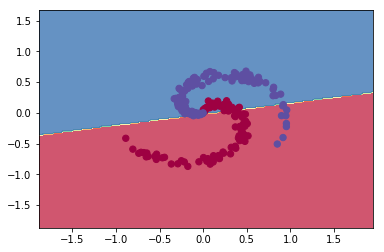

In [10]:
tf.set_random_seed(1)

# Almost-correct Linear Regression
X = tf.placeholder(tf.float32, [None, 2])
Y = tf.placeholder(tf.float32, [None, 1])

W = tf.Variable(tf.random_normal(shape=[2, 1], seed=1))
b = tf.Variable(tf.random_uniform([1]), name="bias")

m = X.shape[0]

first_layer = (tf.matmul(X, W)) + b  ## Y predicted
objective_function = tf.reduce_mean((tf.square(first_layer-Y)))

# the reduce_sum seems to operate on just 1 element

LR = tf.train.GradientDescentOptimizer(learning_rate=.5).minimize(objective_function)

# predicted value above 0.5 -> predict = 1 = classify as positive
predict = tf.cast(tf.greater(first_layer, 0.5), tf.float32)

accu = tf.reduce_mean(tf.cast(tf.equal(predict, Y), tf.float32))

with tf.Session() as se:
    se.run(tf.global_variables_initializer())
    for i in range(100):
        se.run(LR,{X : sample,Y: target.reshape(-1,1)})
        # -1 is like "unspecified"
        print("Epoch:", (i + 1),"loss:", "{:.3f}".format(se.run(objective_function,{X:sample,Y:target.reshape(-1,1)})), 
              "acc:", "{:.3f}".format(se.run(accu,{X:sample,Y:target.reshape(-1,1)})))
    visualize(sample, target, predict, se)

In [11]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline
#this line makes the notebook put the figures in-line rather than generate them in new windows


In [12]:

# helper function for geterating the data
def data_generator(N=100, D=2, K=2):
    # N number of points per class; D dimensionality; k number of classes
    np.random.seed(0)
    X = np.zeros((N * K, D))
    y = np.zeros((N * K), dtype='uint8')
    for j in range(K):
        ix = range(N * j, N * (j + 1))
        r = np.linspace(0.0, 1, N)  # radius
        t = np.linspace(j * 4, (j + 1) * 4, N) + np.random.randn(N) * 0.2  # theta
        X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
        y[ix] = j
    fig = plt.figure()
    plt.title('Figure 1: DataSet')
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)

    plt.xlim(X.min() - .5, X.max() + .5)
    plt.ylim(X.min() - .5, X.max() + .5)
    return X, y


# helper function for visualizing the boundaries
def visualize(sample, target, predict, se):
    """
    function for visualizing the classifier boundaries on the TOY dataset.

    @param sample: Training data features
    @param target: Target
    @param predict: Model prediction
    @param se: The model's session
    """

    h = 0.02
    x_min, x_max = sample[:, 0].min() - 1, sample[:, 0].max() + 1
    y_min, y_max = sample[:, 1].min() - 1, sample[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = np.round(se.run(predict, {X: (np.c_[xx.ravel(), yy.ravel()])}))
    Z = Z.reshape(xx.shape)
    fig = plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(sample[:, 0], sample[:, 1], c=target, s=40, cmap=plt.cm.Spectral)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())



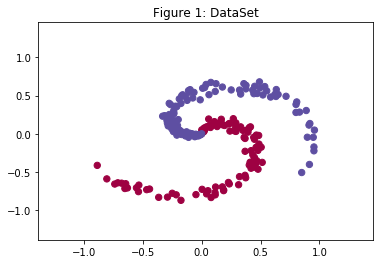

In [13]:
sample, target = data_generator()

Epoch: 0 loss: 0.668 accuracy = 0.745
Epoch: 500 loss: 0.613 accuracy = 0.795
Epoch: 1000 loss: 0.604 accuracy = 0.795
Epoch: 1500 loss: 0.599 accuracy = 0.805
Epoch: 2000 loss: 0.596 accuracy = 0.805
Epoch: 2500 loss: 0.594 accuracy = 0.805
Epoch: 3000 loss: 0.592 accuracy = 0.810
Epoch: 3500 loss: 0.591 accuracy = 0.810
Epoch: 4000 loss: 0.590 accuracy = 0.810
Epoch: 4500 loss: 0.589 accuracy = 0.810
Epoch: 5000 loss: 0.588 accuracy = 0.810
Epoch: 5500 loss: 0.588 accuracy = 0.810
Epoch: 6000 loss: 0.587 accuracy = 0.810
Epoch: 6500 loss: 0.587 accuracy = 0.810
Epoch: 7000 loss: 0.586 accuracy = 0.815
Epoch: 7500 loss: 0.586 accuracy = 0.815
Epoch: 8000 loss: 0.585 accuracy = 0.815
Epoch: 8500 loss: 0.585 accuracy = 0.815
Epoch: 9000 loss: 0.585 accuracy = 0.815
Epoch: 9500 loss: 0.584 accuracy = 0.815


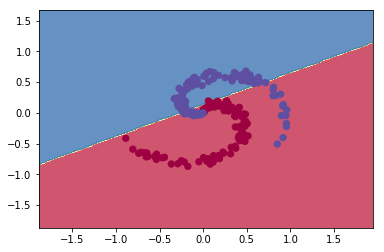

In [14]:
tf.set_random_seed(1)

# Almost-correct Linear Regression
X = tf.placeholder(tf.float32, [None, 2])
Y = tf.placeholder(tf.float32, [None, 1])
W = tf.Variable(tf.random_normal(shape=[2, 1], seed=1))
b = tf.Variable(tf.random_uniform([1]), name="bias")


first_layer = tf.nn.sigmoid(tf.matmul(X, W) + b) 
objective_function = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=first_layer, labels=Y))

# the reduce_sum seems to operate on just 1 element

LR = tf.train.GradientDescentOptimizer(learning_rate=.9).minimize(objective_function)

#predictions = tf.equal(tf.argmax(first_layer, 1), tf.argmax(Y, 1))
#accuracy = tf.reduce_mean(tf.cast(predictions, tf.float32))

delta = tf.abs((Y - first_layer))
predict = tf.cast(tf.greater(first_layer, tf.constant(0.5)), tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predict,Y), tf.float32))

# predicted value above 0.5 -> predict = 1 = classify as positive

epochs = 10000
with tf.Session() as se:
    se.run(tf.global_variables_initializer())
    for i in range(epochs):
        dict_val = {X: sample, Y: target.reshape(-1, 1)}
        _ = se.run(LR, feed_dict={X: sample, Y: target.reshape(-1, 1)})
        if i % 500 == 0:
            loss = objective_function.eval(dict_val)
            acc = accuracy.eval(dict_val)
            print("Epoch:", (i), "loss:", "{:.3f}".format(loss), "accuracy =", "{:.3f}".format(acc))
    visualize(sample, target, predict, se)

In [15]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline
#this line makes the notebook put the figures in-line rather than generate them in new windows

In [16]:

# helper function for geterating the data
def data_generator(N=100, D=2, K=2):
    # N number of points per class; D dimensionality; k number of classes
    np.random.seed(0)
    X = np.zeros((N * K, D))
    y = np.zeros((N * K), dtype='uint8')
    for j in range(K):
        ix = range(N * j, N * (j + 1))
        r = np.linspace(0.0, 1, N)  # radius
        t = np.linspace(j * 4, (j + 1) * 4, N) + np.random.randn(N) * 0.2  # theta
        X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
        y[ix] = j
    fig = plt.figure()
    plt.title('Figure 1: DataSet')
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)

    plt.xlim(X.min() - .5, X.max() + .5)
    plt.ylim(X.min() - .5, X.max() + .5)
    return X, y


# helper function for visualizing the boundaries
def visualize(sample, target, predict, se):
    """
    function for visualizing the classifier boundaries on the TOY dataset.

    @param sample: Training data features
    @param target: Target
    @param predict: Model prediction
    @param se: The model's session
    """

    h = 0.02
    x_min, x_max = sample[:, 0].min() - 1, sample[:, 0].max() + 1
    y_min, y_max = sample[:, 1].min() - 1, sample[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = np.round(se.run(predict, {X: (np.c_[xx.ravel(), yy.ravel()])}))
    Z = Z.reshape(xx.shape)
    fig = plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(sample[:, 0], sample[:, 1], c=target, s=40, cmap=plt.cm.Spectral)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())



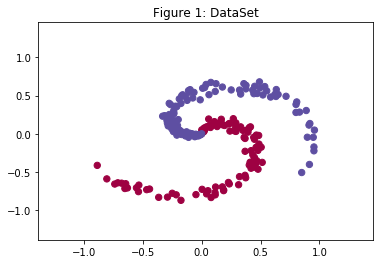

In [17]:
sample, target = data_generator()

Epoch: 1 loss: 4.680 acc: 0.500
Epoch: 2 loss: 4.529 acc: 0.500
Epoch: 3 loss: 4.379 acc: 0.500
Epoch: 4 loss: 4.231 acc: 0.500
Epoch: 5 loss: 4.084 acc: 0.500
Epoch: 6 loss: 3.937 acc: 0.500
Epoch: 7 loss: 3.792 acc: 0.500
Epoch: 8 loss: 3.647 acc: 0.500
Epoch: 9 loss: 3.504 acc: 0.495
Epoch: 10 loss: 3.362 acc: 0.460
Epoch: 11 loss: 3.222 acc: 0.415
Epoch: 12 loss: 3.084 acc: 0.390
Epoch: 13 loss: 2.947 acc: 0.365
Epoch: 14 loss: 2.809 acc: 0.350
Epoch: 15 loss: 2.671 acc: 0.340
Epoch: 16 loss: 2.533 acc: 0.340
Epoch: 17 loss: 2.395 acc: 0.335
Epoch: 18 loss: 2.260 acc: 0.330
Epoch: 19 loss: 2.127 acc: 0.340
Epoch: 20 loss: 1.998 acc: 0.365
Epoch: 21 loss: 1.874 acc: 0.395
Epoch: 22 loss: 1.756 acc: 0.425
Epoch: 23 loss: 1.647 acc: 0.460
Epoch: 24 loss: 1.545 acc: 0.495
Epoch: 25 loss: 1.454 acc: 0.505
Epoch: 26 loss: 1.371 acc: 0.530
Epoch: 27 loss: 1.294 acc: 0.535
Epoch: 28 loss: 1.222 acc: 0.540
Epoch: 29 loss: 1.154 acc: 0.550
Epoch: 30 loss: 1.091 acc: 0.550
Epoch: 31 loss: 1.0

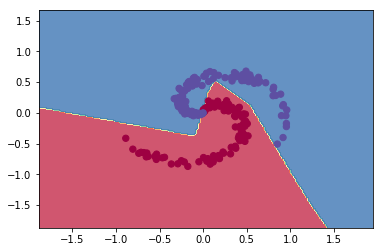

In [18]:
# tf.set_random_seed(1)

# Almost-correct Linear Regression
X = tf.placeholder(tf.float32, [None, 2])
Y = tf.placeholder(tf.float32, [None, 1])
W = tf.Variable(tf.random_normal(shape=[2, 1], seed=1))
b = tf.Variable(tf.random_uniform([1]), name="b")

def sigmoid(x):
    return 1/(1+tf.math.exp(-x))


n_hidden1 = 5
n_hidden2 = 5
n_input = 2


# Weight and Biases first hidden layer
w1 = tf.Variable(tf.random_normal([n_input, n_hidden1], seed=1))
b1 = tf.Variable(tf.random_uniform([n_hidden1]))

# Weight and Biases second hidden layer
w2 = tf.Variable(tf.random_normal([n_hidden1, n_hidden2], seed=1))
b2 = tf.Variable(tf.random_uniform([n_hidden2]))

# Weight and Biases second hidden layer
w3 = tf.Variable(tf.random_normal([n_hidden2, 1], seed=1))
b3 = tf.Variable(tf.random_uniform([1]))


layer_1 = tf.add(tf.matmul(X, w1), b1)
layer_1 = tf.maximum(0.0, layer_1)
layer_2 = tf.add(tf.matmul(layer_1, w2), b2)
layer_2 = tf.maximum(0.0, layer_2)
out = tf.add(tf.matmul(layer_2, w3), b3)

loss = tf.reduce_mean(-Y*tf.math.log(sigmoid(out)) - (1-Y)* tf.math.log(1-sigmoid(out)))
LR = tf.train.AdamOptimizer(learning_rate=0.005).minimize(loss)

predict = tf.cast(tf.greater(out, 0.5), tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predict,Y), tf.float32))

epochs = 2000

se = tf.Session()
se.run(tf.global_variables_initializer())

for i in range(epochs):
    se.run(LR,{X : sample,Y: target.reshape(-1,1)})
    print("Epoch:", (i + 1),"loss:", "{:.3f}".format(se.run(loss,{X:sample,Y:target.reshape(-1,1)})), "acc:", "{:.3f}".format(se.run(accuracy,{X:sample,Y:target.reshape(-1,1)})))
visualize(sample,target, predict,se)

In [19]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
%matplotlib inline

#this line makes the notebook put the figures in-line rather than generate them in new windows

In [20]:

# helper functions
# helper function for geterating the data
def data_generator(N=100, D=2, K=2):
    # N number of points per class; D dimensionality; k number of classes
    np.random.seed(0)
    X = np.zeros((N * K, D))
    y = np.zeros((N * K), dtype='uint8')
    for j in range(K):
        ix = range(N * j, N * (j + 1))
        r = np.linspace(0.0, 1, N)  # radius
        t = np.linspace(j * 4, (j + 1) * 4, N) + np.random.randn(N) * 0.2  # theta
        X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
        y[ix] = j
    fig = plt.figure()
    plt.title('Figure 1: DataSet')
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)

    plt.xlim(X.min() - .5, X.max() + .5)
    plt.ylim(X.min() - .5, X.max() + .5)
    return X, y


# helper function for visualizing the boundaries
# helper function for visualizing the boundaries
def visualize(sample, target, model, se):
    """
    function for visualizing the classifier boundaries on the TOY dataset.

    @param sample: Training data features
    @param target: Target
    @param predict: Model prediction
    @param se: The model's session
    """

    h = 0.02
    x_min, x_max = sample[:, 0].min() - 1, sample[:, 0].max() + 1
    y_min, y_max = sample[:, 1].min() - 1, sample[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    XX = {X: (np.c_[xx.ravel(), yy.ravel()])}
    Z = np.round(model.predict(np.c_[xx.ravel(), yy.ravel()], steps=64))
    Z = Z.reshape(xx.shape)
    fig = plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(sample[:, 0], sample[:, 1], c=target, s=40, cmap=plt.cm.Spectral)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())



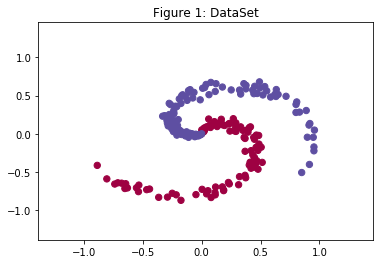

In [21]:
sample, target = data_generator()

In [22]:
tf.set_random_seed(1)

# Almost-correct Linear Regression
X = tf.placeholder(tf.float32, [None, 2])
Y = tf.placeholder(tf.float32, [None, 1])
W = tf.Variable(tf.random_normal(shape=[2, 1], seed=1))
b = tf.Variable(tf.random_uniform([1]), name="bias")

xx = sample
yy = target.reshape(-1, 1)


def run_model():
    # define model
    model = Sequential()
    model.add(Dense(16, activation='relu', kernel_initializer='he_normal'))
    model.add(Dense(12, activation='relu', kernel_initializer='he_normal'))
    model.add(Dense(4, activation='relu', kernel_initializer='he_normal'))
    model.add(Dense(1, activation='sigmoid'))
    # compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


epochs = 10
with tf.Session() as se:
    se.run(tf.global_variables_initializer())
    for i in range(epochs):
        model = run_model()
        # fit the model
        model.fit(xx, yy, epochs=epochs, steps_per_epoch=100, batch_size=200, verbose=0)
        # evaluate the model
        loss, acc = model.evaluate(xx, yy, verbose=0)
        # print('Test Accuracy: %.8f' % acc)
        print("Epoch:", (i), "loss:", "{:.3f}".format(loss), "accuracy =", "{:.15f}".format(acc))

    #visualize(sample, target, model, se)



Instructions for updating:
Use tf.cast instead.
Epoch: 0 loss: 0.020 accuracy = 0.995000004768372
Epoch: 1 loss: 0.017 accuracy = 0.995000004768372
Epoch: 2 loss: 0.023 accuracy = 0.995000004768372
Epoch: 3 loss: 0.022 accuracy = 0.995000004768372
Epoch: 4 loss: 0.014 accuracy = 0.995000004768372
Epoch: 5 loss: 0.020 accuracy = 0.995000004768372
Epoch: 6 loss: 0.024 accuracy = 0.995000004768372
Epoch: 7 loss: 0.022 accuracy = 0.995000004768372
Epoch: 8 loss: 0.027 accuracy = 0.995000004768372
Epoch: 9 loss: 0.022 accuracy = 0.995000004768372
